## Logistic Regression with large data set

In [1]:
# import everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

We are going to use built-in datasets from `sklearn` for this example.


In [2]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(iris.data, 
                  columns=['sepal length /cm', 'sepal width /cm', 'petal length /cm', 'petal width /cm'])
df['class'] = iris.target
df.head()

,sepal length /cm,sepal width /cm,petal length /cm,petal width /cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.tail()

,sepal length /cm,sepal width /cm,petal length /cm,petal width /cm,class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


As we see from the result returned from `load_iris()` The target/class we want to predict contains three labels
Setosa: 0
Versicolor: 1
Veriginica: 2

We also have 4 features that determine which class each should be in

In [5]:
# we are going to use the last two features (petal length & petal width) 
X = df.iloc[:,2:4]

# use 'class' as the target we're trying to predict
y = df['class']
X.head()

,petal length /cm,petal width /cm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Train our Model

Now, we can do train test split, then use our training set to train our model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
X_train.head()

,petal length /cm,petal width /cm
4,1.4,0.2
32,1.5,0.1
142,5.1,1.9
85,4.5,1.6
86,4.7,1.5


In [8]:
# we are going to fit our model to the training set

# need to specify multi_class = 'multinomial' and solver
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42)
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
y_pred = logReg.predict(X_test)

In [10]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


### Model Validation

Like Linear Regression, we want to know how well our model predicts.
Since we are doing classification with Logistics Regression, we want to use 
`accuracy_core()` from `sklearn.metrics`.
A closer result to 1 means better prediction.

In [11]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

1.0


In [12]:
# we can use this model to predict any data values
print(logReg.predict([[1.6, 0.25]]))
print(logReg.predict([[4.7, 2.2]]))

[0]
[2]


### Binary Classification

We'll choose one feature from the Iris dataset instead of two.

In [13]:
# here is the dataset we have 
df.head()

,sepal length /cm,sepal width /cm,petal length /cm,petal width /cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# we are going to choose  'sepal length' as the only feature.

X2 = df.iloc[:, 0:1] # select the first column from the original dataset
y2 = df['class']
X2.head()

,sepal length /cm
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [15]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state = 42)

In [16]:
X2_train.head()

,sepal length /cm
4,5.0
32,5.2
142,5.8
85,6.0
86,6.7


In [17]:
# initiate a new instance of Logistic Regression Model

logReg2 = LogisticRegression (solver = 'lbfgs', multi_class = 'auto', random_state = 42) # use the same seed for random_state 
logReg2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y2_pred = logReg2.predict(X2_test)
print(y2_pred)

[1 1 2 1 2 1 1 2 2 1 2 0 1 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 1 2 0 0 2 2
 0]


In [18]:
print(y2_test)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
Name: class, dtype: int64


In [19]:
# The accuracy score in this case is not as high as when we chose petal dimesnsions
# This indicates that the classification of Iris may rely more on petal length and width
print(accuracy_score(y2_test, y2_pred))

0.7368421052631579


In [20]:
df_zero = df.loc[df['class'] == 0]
df_one = df.loc[df['class'] == 1]
df_two = df.loc[df['class'] == 2]
df_zero.head()

,sepal length /cm,sepal width /cm,petal length /cm,petal width /cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
xx, yy = np.mgrid[0:8:0.01, 0:3:0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
prob = logReg.predict_proba(grid)[:,1].reshape(xx.shape)
prob

array([[6.72855373e-04, 6.75240943e-04, 6.77634966e-04, ...,
        1.92392093e-03, 1.93073349e-03, 1.93757012e-03],
       [6.90690973e-04, 6.93139735e-04, 6.95597172e-04, ...,
        1.97485336e-03, 1.98184591e-03, 1.98886317e-03],
       [7.08999012e-04, 7.11512636e-04, 7.14035166e-04, ...,
        2.02713140e-03, 2.03430867e-03, 2.04151131e-03],
       ...,
       [3.61690406e-02, 3.53081599e-02, 3.44670369e-02, ...,
        2.24897256e-05, 2.19348546e-05, 2.13936732e-05],
       [3.53420866e-02, 3.45001842e-02, 3.36776371e-02, ...,
        2.19567029e-05, 2.14149825e-05, 2.08866272e-05],
       [3.45333623e-02, 3.37100518e-02, 3.29057008e-02, ...,
        2.14363130e-05, 2.09074315e-05, 2.03915984e-05]])

[Text(0, 0.5, 'petal width /cm'), Text(0.5, 0, 'petal length /cm')]

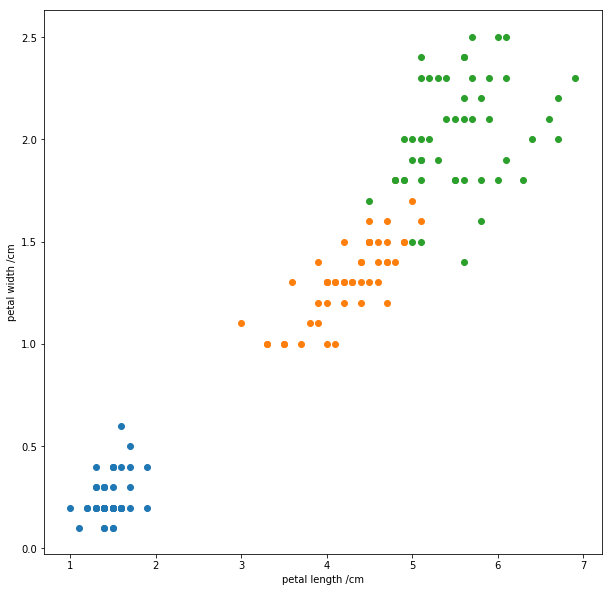

In [21]:

fig, ax = plt.subplots(figsize=(10,10))


ax.scatter(df_zero.iloc[:, 2:3], df_zero.iloc[:, 3:4])
ax.scatter(df_one.iloc[:, 2:3], df_one.iloc[:, 3:4])
ax.scatter(df_two.iloc[:, 2:3], df_two.iloc[:, 3:4])
ax.set(xlabel = 'petal length /cm', ylabel = 'petal width /cm')